In [491]:
import pandas as pd
import statistics
import numpy
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [447]:
data = pd.read_csv("Real estate.csv")

In [448]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [449]:
data.drop(labels = ["No"], axis = 1, inplace = True)

In [450]:
for column_name in data.columns :
    print(column_name)

X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


In [451]:
data.columns = ["X1", "X2", "X3", "X4", "X5", "X6", "Y"]
num_columns = len(data.columns)
num_features = num_columns - 1

In [452]:
inputs = data[["X1", "X2", "X3", "X4", "X5", "X6"]]
output = data[["Y"]]
X = inputs.to_numpy()
y = output.to_numpy()

In [453]:
#mu = []
#sigma = []
for i in range(num_features) :
    column_name = "X" + str(i + 1)
    print("Maximum value of " + column_name + " = " + str(max(inputs[column_name])))
    print("Minimum value of " + column_name + " = " + str(min(inputs[column_name])))
    #mu.append(statistics.mean(inputs[column_name]))
    #sigma.append(statistics.stdev(inputs[column_name]))
#means = numpy.array(mu)
#standard_deviations = numpy.array(sigma)

Maximum value of X1 = 2013.5829999999999
Minimum value of X1 = 2012.6670000000001
Maximum value of X2 = 43.8
Minimum value of X2 = 0.0
Maximum value of X3 = 6488.021
Minimum value of X3 = 23.382839999999998
Maximum value of X4 = 10
Minimum value of X4 = 0
Maximum value of X5 = 25.01459
Minimum value of X5 = 24.93207
Maximum value of X6 = 121.56626999999999
Minimum value of X6 = 121.47353000000001


In [454]:
def featureScalingAndNormalization(X):
    m, n = X.shape
    means = numpy.zeros((1, n), dtype = float)
    standard_deviations = numpy.zeros((1, n), dtype = float)
    transformed_X = numpy.zeros((m, n), dtype = float)
    for i in range(n) :
        current_column = X[:, i]
        minimum = min(current_column)
        current_column = (current_column - minimum) / (max(current_column) - minimum)
        transformed_X[:, i] = current_column
    return transformed_X

In [455]:
transformed_X = generate_quadratic_features(X)
transformed_X = featureScalingAndNormalization(transformed_X)

In [456]:
#transformed_X = featureScalingAndNormalization(X)

In [457]:
#h(x) = theta_0 + theta_1 * X1 + theta_2 * X2 + ... + theta6 * X6
m, n = transformed_X.shape
initial_theta = numpy.zeros((n + 1, 1), dtype = float)
data_matrix_X = numpy.ones((m, n + 1), dtype = float)
data_matrix_X[:, 1 : ] = transformed_X

In [458]:
def computeCostAndGradient(X, y, theta, regularization_parameter) :
    m, n = X.shape
    predicted_values = numpy.matmul(X, theta)
    predicted_minus_actual = predicted_values - y

    theta_for_regularization = theta
    theta_for_regularization[0, 0] = 0
    
    J = (1 / (2 * m)) * (numpy.matmul(predicted_minus_actual.transpose(), predicted_minus_actual) + (regularization_parameter * (numpy.matmul(theta_for_regularization.transpose(), theta_for_regularization))))
    gradients = (1 / m) * (numpy.matmul(X.transpose(), predicted_minus_actual) + (regularization_parameter * theta_for_regularization))
    return J, gradients

In [459]:
def gradientDescent(X, y, initial_theta, regularization_parameter, max_iterations = 100, learning_rate = 0.01) :
    J_history = numpy.zeros((max_iterations, 1), dtype = float)
    theta = initial_theta
    for i in range(max_iterations) :
        J_history[i, 0], gradients = computeCostAndGradient(X, y, theta, regularization_parameter)
        theta = theta - (learning_rate * gradients)
    return J_history, theta

In [460]:
X_train = data_matrix_X[:-1,:]
X_test = data_matrix_X[-1, :]
y_train = y[:-1, :]
y_test = y[-1, :]

In [484]:
J_history, theta = gradientDescent(X_train, y_train, initial_theta, 0, learning_rate = 0.1, max_iterations = 10000)

In [462]:
def predict(X, theta) :
    predicted = numpy.matmul(X, theta)
    return predicted

In [486]:
predicted_values = predict(X_test, theta)

In [445]:
def generate_quadratic_features(X) :
    m, n = X.shape
    total_new_features = int((n * (n + 1)) / 2)
    new_features = numpy.zeros((m, total_new_features), dtype = float)
    k = 0
    
    for i in range(n) :
        for j in range(i, n) :
            new_features[:, k] = X[:, i] * X[:, j]
            k = k + 1
    
    #print(new_features[0])
    X_with_quadratic_features = numpy.zeros((m, n + total_new_features), dtype = float)
    X_with_quadratic_features[:, range(n)] = X
    #print(X_with_quadratic_features[0])
    X_with_quadratic_features[:, range(n, n + total_new_features)] = new_features
    #print(X_with_quadratic_features[0])
    
    return X_with_quadratic_features

In [485]:
J_history

array([[810.61880145],
       [224.09032388],
       [140.93212408],
       ...,
       [ 35.37014512],
       [ 35.37000504],
       [ 35.36986496]])

In [487]:
predicted_values

array([57.1427201])

In [488]:
y_test

array([63.9])

In [489]:
lm = linear_model.LinearRegression()
model = lm.fit(inputs.iloc[:-1], output.iloc[:-1])
sklearn_predictions = model.predict(inputs.iloc[-1].to_numpy().reshape(1, -1))

In [490]:
sklearn_predictions

array([[53.7398457]])

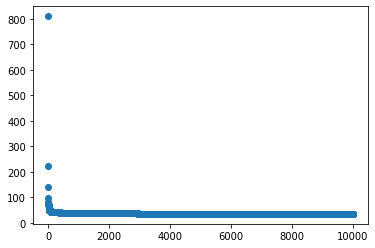

In [493]:
plt.scatter(range(1, 10001), J_history)
plt.show()